EXPLANATION OF OUTPUT VARIABLES (the relevant trials are the "canvas-keyboard-response" ones):

Experiment flow:
- *block_index* -> index of the block (NB: starts from zero)
- *presentation_index* -> index of the presentation inside one block (NB: starts from zero)

Experiment parameters:
- *clique_size* -> size of the clique in one of the two displayed graphs
- *graphs_size* -> size of the displayed graphs 
- *graphs_couple* -> couple of graphs shown in current trial
- *nodes_order* -> order of the nodes in current trial

Dependent variables:
- *rt* -> response time in ms (collected automatically)
- *response* -> in this experiment, the accepted keys are " "; "arrowright" or "arrowleft"
- *accuracy* -> this variable is manually computed and added only to the trials where response was arrowright or arrowleft

Comparison variables:
- *correct_response* -> correct response for current trial

Produced automatically / not relevant:

For all trials:
- *trial_type* -> the name of the plugin used to run the trial (the real trials of the experiment are "canvas-keyboard-response")
- *trial_index* -> the index of the current trial across the whole experiment (it is a global counter of trials, it also includes instructions and tutorial ones)
- *time_elapsed* -> the number of milliseconds between the start of the experiment and when the trial ended
- *internal_node_id* -> string identifier for the current TimelineNode

For preload plugin:
- *success*	-> if true, then all files loaded successfully within the max_load_time. If false, then one or more file requests returned a failure and/or the file loading did not complete within the max_load_time duration.
- *timeout* -> 	if true, then the files did not finish loading within the max_load_time duration. If false, then the file loading did not timeout.
- *failed_images* -> one or more image file paths that produced a loading failure before the trial ended.
- *failed_audio* -> one or more audio file paths that produced a loading failure before the trial ended.
- *failed_video* -> one or more video file paths that produced a loading failure before the trial ended.

For instructions plugin:
- *rt* -> the response time (in ms) for the subject to view all of the pages
- *view_history* -> array containing the order of pages the subject viewed (collected only for "instructions" plugin)

For image-keyboard-response plugin:
- *stimulus* -> the path of the image that was displayed.



------------------------------------------------------------------------------------------------------------

Importing packages:

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from pathlib import Path

Importing and "cleaning" a single experiment csv file:

In [2]:
file1Path = Path('C:/Users/danie/OneDrive/Desktop/HUPLACLIP-analysis/data_analysis/pilot_1/data/HUPLACLIP_pilot_subj4_2023-04-26_16h14.35.530.csv')
df1 = pd.read_csv(file1Path)
print(df1.shape)
print(df1.info())

(565, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trial_type          565 non-null    object 
 1   trial_index         565 non-null    int64  
 2   time_elapsed        565 non-null    int64  
 3   internal_node_id    565 non-null    object 
 4   view_history        8 non-null      object 
 5   rt                  561 non-null    float64
 6   success             3 non-null      object 
 7   timeout             3 non-null      object 
 8   failed_images       3 non-null      object 
 9   failed_audio        3 non-null      object 
 10  failed_video        3 non-null      object 
 11  stimulus            39 non-null     object 
 12  response            553 non-null    object 
 13  nodes_order         514 non-null    object 
 14  correct_response    514 non-null    object 
 15  graphs_couple       120 non-null    object 
 16

In [3]:
# isolating experiment trials ("canvas-keyboard-response" ones)
df1_experiment = df1[df1.trial_type == "canvas-keyboard-response"]
df1_experiment.head()
print(df1_experiment.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 47 to 563
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trial_type          514 non-null    object 
 1   trial_index         514 non-null    int64  
 2   time_elapsed        514 non-null    int64  
 3   internal_node_id    514 non-null    object 
 4   view_history        0 non-null      object 
 5   rt                  514 non-null    float64
 6   success             0 non-null      object 
 7   timeout             0 non-null      object 
 8   failed_images       0 non-null      object 
 9   failed_audio        0 non-null      object 
 10  failed_video        0 non-null      object 
 11  stimulus            0 non-null      object 
 12  response            514 non-null    object 
 13  nodes_order         514 non-null    object 
 14  correct_response    514 non-null    object 
 15  graphs_couple       120 non-null    object 
 16  accurac

In [4]:
# dropping empty/irrelevant variables:
df1_cleaned = df1_experiment.drop(["view_history","trial_index", "time_elapsed","internal_node_id" ,"success", "timeout", "failed_images", "failed_audio", "failed_video", "stimulus"], axis=1)
print(df1_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 47 to 563
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trial_type          514 non-null    object 
 1   rt                  514 non-null    float64
 2   response            514 non-null    object 
 3   nodes_order         514 non-null    object 
 4   correct_response    514 non-null    object 
 5   graphs_couple       120 non-null    object 
 6   accuracy            120 non-null    object 
 7   block_index         514 non-null    float64
 8   presentation_index  514 non-null    float64
 9   clique_size         514 non-null    float64
 10  graph_size          514 non-null    float64
dtypes: float64(5), object(6)
memory usage: 48.2+ KB
None


In [5]:
# visualizing the data
df1_cleaned.tail()

,trial_type,rt,response,nodes_order,correct_response,graphs_couple,accuracy,block_index,presentation_index,clique_size,graph_size
559,canvas-keyboard-response,2142.0,arrowleft,"[154,37,93,144,46,295,212,147,297,91,113,31,20...",arrowleft,"[{""1"":[1],""2"":[1,1],""3"":[1,1,1],""4"":[1,1,1,0],...",True,3.0,28.0,12.0,300.0
560,canvas-keyboard-response,1644.0,,"[134,222,286,121,267,258,142,48,69,46,261,115,...",arrowleft,NaN,NaN,3.0,29.0,12.0,300.0
561,canvas-keyboard-response,1737.0,,"[237,213,182,107,156,247,66,127,288,155,192,8,...",arrowleft,NaN,NaN,3.0,29.0,12.0,300.0
562,canvas-keyboard-response,1080.0,,"[140,170,55,210,219,141,270,49,272,245,96,157,...",arrowleft,NaN,NaN,3.0,29.0,12.0,300.0
563,canvas-keyboard-response,518.0,arrowright,"[262,34,131,106,2,250,161,294,208,249,285,224,...",arrowleft,"[{""1"":[0],""2"":[0,0],""3"":[0,1,1],""4"":[0,0,0,0],...",False,3.0,29.0,12.0,300.0


In [6]:
# checking size:
df1_cleaned.shape

(514, 11)

In [7]:
# isolating trials were final responses were given (shuffles have " " as response):
df1_cleaned_final_answers = df1_cleaned[df1_cleaned['response'].isin(['arrowright','arrowleft'])]
print(df1_cleaned_final_answers.shape)     #final responses should be 120 (30 for each one of the 4 blocks)
# counting the final answers for each clique size
df1_cleaned_final_answers['clique_size'].value_counts()  #the clique sizes should be 15, and there should be 8 trials for each clique size

(120, 11)


175.0    8
163.0    8
152.0    8
140.0    8
128.0    8
117.0    8
105.0    8
93.0     8
82.0     8
70.0     8
58.0     8
47.0     8
35.0     8
23.0     8
12.0     8
Name: clique_size, dtype: int64

Text(0.5, 1.0, 'sample size = 1')

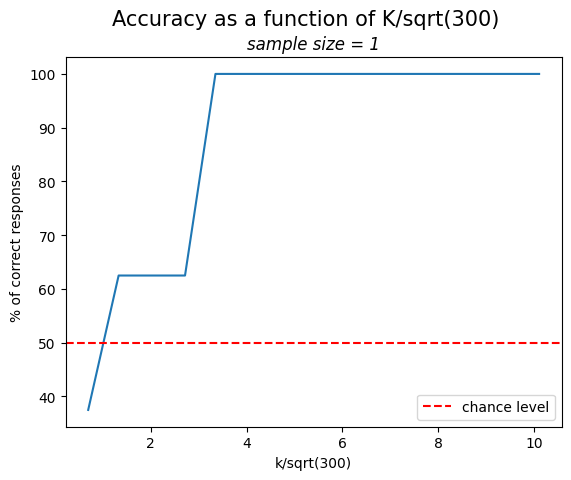

In [8]:
# plotting fraction correct as a function of "clique_size"
# - calculating accuracy for the different levels of "clique_size"
fraction_correct_dict = dict()
# reversing the order of clique_size array:
reversed_clique_size_array = df1_cleaned_final_answers.clique_size.unique()[::-1]
for i in reversed_clique_size_array:
    # isolating data of current clique size:
    current_data = df1_cleaned_final_answers[df1_cleaned_final_answers.clique_size == i]
    # calculating fraction correct for current clique size
    fraction_correct_current_clique_size = sum(current_data.accuracy == True) / sum(~ current_data.accuracy.isna())
    # adding to the dictionary
    fraction_correct_dict[str(round(i))] = fraction_correct_current_clique_size
    
    # #DEBUG:
    # print("clique size:")
    # print(i)
    # print("fraction correct:")
    # print(fraction_correct_current_clique_size)
    # print(current_data.accuracy)
    
# plotting the results:
# - obtaining appropriate x and y values:
x_values = list(fraction_correct_dict.keys())
x_values = [int(x_value)/(math.sqrt(300))  for x_value in x_values]
y_values = list(fraction_correct_dict.values())
y_values = [y_value * 100 for y_value in y_values]
# - drawing plot:
plt.plot(x_values,y_values)
plt.xlabel("k/sqrt(300)")
plt.ylabel("% of correct responses")
# plotting chance level line and adding legend
plt.axhline(y = 50, color = 'r', linestyle = 'dashed', label = "chance level")
plt.legend(loc = 'lower right')
plt.suptitle("Accuracy as a function of K/sqrt(300)", fontsize = 15)
plt.title("sample size = 1", fontstyle= "italic")

Importing multiple csv files, combining them in a single dataframe and removing irrelvant variables:

In [9]:
# creating empty dataframe:
data = pd.DataFrame()
# accessing all json files in 'data' directory:
files = Path('C:/Users/danie/OneDrive/Desktop/HUPLACLIP-analysis/data_analysis/pilot_1/data/').glob('*.csv')
fileCounter = 0
for file in files:
    # reading single csv file as dataframe
    df = pd.read_csv(file)
    # adding single dataframe to general dataframe:
    data = pd.concat([data,df])
    # incrementing file counter (will be used to label the graph):
    fileCounter += 1

# checking dimension of data and printing the names of the variables:
print(data.shape)
print(data.columns.tolist())

# isolating experiment trials ("canvas-keyboard-response" ones)
data_experiment = data[data.trial_type == "canvas-keyboard-response"]

# dropping irrelevant variables:
data_experiment.drop(["view_history","trial_index", "time_elapsed","internal_node_id" ,"success", "timeout", "failed_images", "failed_audio", "failed_video", "stimulus"], axis=1, inplace=True)

# checking that cleaning happened successfully:
print(data_experiment.shape)
data_experiment.tail()

(2039, 21)
['trial_type', 'trial_index', 'time_elapsed', 'internal_node_id', 'view_history', 'rt', 'success', 'timeout', 'failed_images', 'failed_audio', 'failed_video', 'stimulus', 'response', 'nodes_order', 'correct_response', 'graphs_couple', 'accuracy', 'block_index', 'presentation_index', 'clique_size', 'graph_size']
(1682, 11)


C:\Users\danie\AppData\Local\Temp\ipykernel_6120\818132131.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_experiment.drop(["view_history","trial_index", "time_elapsed","internal_node_id" ,"success", "timeout", "failed_images", "failed_audio", "failed_video", "stimulus"], axis=1, inplace=True)


,trial_type,rt,response,nodes_order,correct_response,graphs_couple,accuracy,block_index,presentation_index,clique_size,graph_size
165,canvas-keyboard-response,1267.0,arrowleft,"[167,211,38,105,250,69,293,8,27,100,15,194,75,...",arrowright,"[{""1"":[0],""2"":[0,0],""3"":[1,1,1],""4"":[1,1,1,0],...",False,3.0,25.0,35.0,300.0
166,canvas-keyboard-response,1225.0,arrowleft,"[64,210,283,38,298,146,265,37,268,119,121,277,...",arrowright,"[{""1"":[0],""2"":[0,1],""3"":[1,1,0],""4"":[0,0,1,1],...",False,3.0,26.0,23.0,300.0
167,canvas-keyboard-response,1075.0,arrowright,"[184,154,49,284,225,203,256,175,151,213,26,257...",arrowleft,"[{""1"":[0],""2"":[0,1],""3"":[1,0,0],""4"":[0,1,1,0],...",False,3.0,27.0,23.0,300.0
168,canvas-keyboard-response,1472.0,arrowright,"[194,258,108,48,1,176,218,122,46,255,56,217,37...",arrowleft,"[{""1"":[0],""2"":[1,0],""3"":[0,0,1],""4"":[0,1,1,0],...",False,3.0,28.0,12.0,300.0
169,canvas-keyboard-response,1193.0,arrowleft,"[31,203,272,204,70,238,85,87,99,176,120,152,28...",arrowright,"[{""1"":[0],""2"":[0,1],""3"":[0,1,0],""4"":[0,1,1,1],...",False,3.0,29.0,12.0,300.0


In [10]:
# isolating trials were final responses were given (shuffles have " " as response):
data_experiment_final = data_experiment[data_experiment['response'].isin(['arrowright','arrowleft'])]
print(data_experiment_final.shape)     # final responses = 12*(number of csv files in data folder)
# counting the final answers for each clique size
print(data_experiment_final['clique_size'].value_counts()  )

(840, 11)
175.0    56
163.0    56
152.0    56
140.0    56
128.0    56
117.0    56
105.0    56
93.0     56
82.0     56
70.0     56
58.0     56
47.0     56
35.0     56
23.0     56
12.0     56
Name: clique_size, dtype: int64


Text(0.5, 1.0, 'sample size = 7')

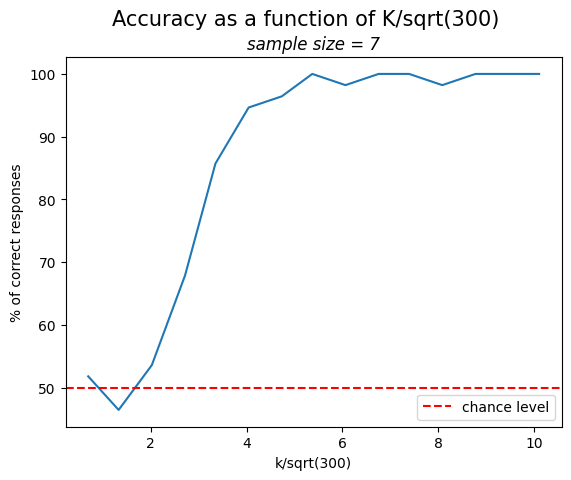

In [11]:
# plotting fraction correct as a function of "clique_size"
# - calculating accuracy for the different levels of "clique_size"
fraction_correct_dict = dict()
# reversing the order of clique_size array:
reversed_clique_size_array = df1_cleaned_final_answers.clique_size.unique()[::-1]
for i in reversed_clique_size_array:
    # isolating data of current clique size:
    current_data = data_experiment_final[data_experiment_final.clique_size == i]
    # calculating fraction correct for current clique size
    fraction_correct_current_clique_size = sum(current_data.accuracy == True) / sum(~ current_data.accuracy.isna())
    # adding to the dictionary
    fraction_correct_dict[str(round(i))] = fraction_correct_current_clique_size
    
    # # DEBUG:
    # print("clique size:")
    # print(i)
    # print("fraction correct:")
    # print(fraction_correct_current_clique_size)
    # print(current_data.accuracy)
    
# plotting the results:
# - obtaining appropriate x and y values:
x_values = list(fraction_correct_dict.keys())
x_values = [int(x_value)/(math.sqrt(300))  for x_value in x_values]
y_values = list(fraction_correct_dict.values())
y_values = [y_value * 100 for y_value in y_values]
# - drawing plot:
plt.plot(x_values,y_values)
plt.xlabel("k/sqrt(300)")
plt.ylabel("% of correct responses")
# plotting chance level line and adding legend
plt.axhline(y = 50, color = 'r', linestyle = 'dashed', label = "chance level")
plt.legend(loc = 'lower right')
plt.suptitle("Accuracy as a function of K/sqrt(300)", fontsize = 15)
plt.title('sample size = {}'.format(fileCounter), fontstyle= "italic")

---------------------------------------------------------------------

(TO ADAPT FROM HERE ON)

- Accuracy:

0.825
[200. 190. 180. 170. 160. 150. 140. 130. 120. 110. 100.  90.  80.  70.
  60.  50.  40.  30.  20.  10.]


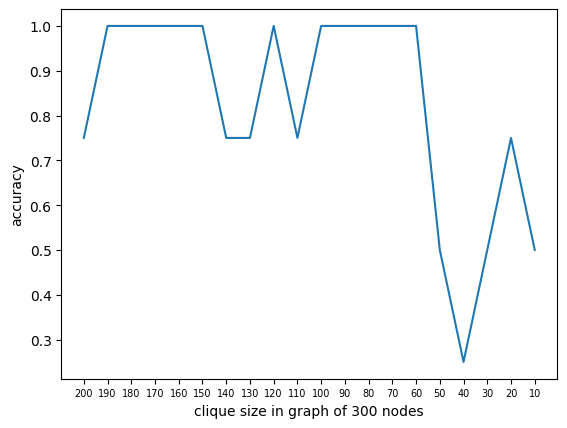

In [6]:
# 1. overall accuracy ( # correct answers / # final answers )
overall_accuracy = sum(data_experiment.correctnessOfResponse == 1) / sum(~ data_experiment.correctnessOfResponse.isna())
print(overall_accuracy)

# 2. calculating accuracy for the levels of "cliqueSize"
# - obtaining levels of "cliqueSize" (this should match with experiment parameters)
print(data_experiment.cliqueSize.unique())
# - calculating accuracy for the different levels of "cliqueSize"
accuracy_dict = dict()
for i in data_experiment.cliqueSize.unique():
    # isolating data of current clique size:
    current_data = data_experiment[data_experiment.cliqueSize == i]
    accuracy_current_cliqueSize = sum(current_data.correctnessOfResponse == 1) / sum(~ current_data.correctnessOfResponse.isna())
    accuracy_dict[str(round(i))] = accuracy_current_cliqueSize
# plotting the results:
x_values = accuracy_dict.keys()
y_values = accuracy_dict.values()
plt.plot(x_values,y_values)
plt.xlabel("clique size in graph of 300 nodes")
plt.ylabel("accuracy")
plt.tick_params(axis='x', which='major', labelsize=7)

- Number of shuffles:

In [7]:
# 1. average number of shuffles
# 2. calculating number of shuffles for the levels of "cliqueSize"  (plotting the results)
# note: if number of shuffles increases as a function of "cliqueSize", it could be helping subjects for difficult instances of the task

- Reaction times:

False    391
True       4
Name: rt, dtype: int64


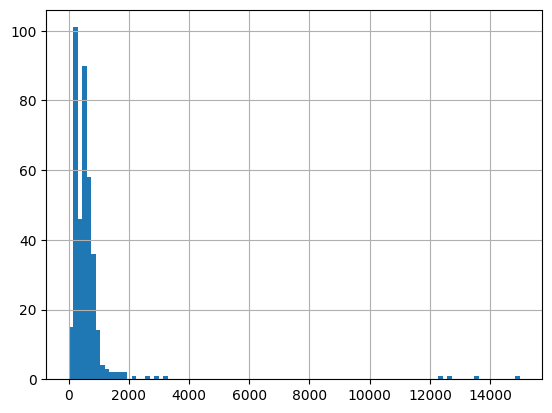

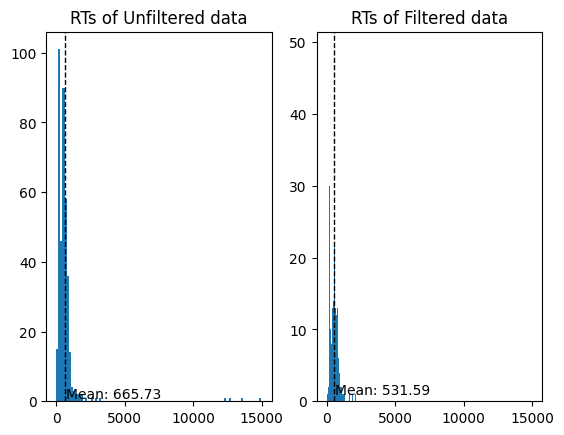

In [8]:
# 1. average RT (for all trials, both final responses and shuffles)
# 2. RT as a function of "cliqueSize"
# note: if reaction time increases as a function of "cliqueSize", it could be an indication of increasing difficulty

###########################################################


# histogram of reaction times distribution (TO REVIEW):
data.rt.hist(bins=100)
# counting trials that were too slow and removing them (exclusion criterion: rt>7500)
print((data.rt>=7500).value_counts())
data_filtered = data.query('rt < 7500')

#plotting unfiltered and filtered data:
fig, (ax1,ax2) = plt.subplots(1, 2,sharex=True)
min_ylim, max_ylim = plt.ylim()
#unfiltered data
ax1.hist(data.rt,bins=100)
ax1.axvline(data.rt.mean(), color='k', linestyle='dashed', linewidth=1)
ax1.text(data.rt.mean()*1.1,max_ylim*0.9, 'Mean: {:.2f}'.format(data.rt.mean()))
ax1.set_title("RTs of Unfiltered data")
#filtered data
ax2.hist(data_filtered.rt,bins=100)
ax2.axvline(data_filtered.rt.mean(), color='k', linestyle='dashed', linewidth=1)
ax2.text(data_filtered.rt.mean()*1.1,max_ylim*0.9, 'Mean: {:.2f}'.format(data_filtered.rt.mean()))
ax2.set_title("RTs of Filtered data")
plt.show()